In [250]:
#importing initial packages
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sp
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [40]:
df = pd.read_csv('kc_house_data_train.csv', index_col=0)
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [41]:
#checking the datatypes
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [42]:
#checking for null values
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [46]:
#removing id column as its useless
#df.drop('id',axis=1,inplace=True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [47]:
df.shape

(17290, 20)

In [49]:
df['bedrooms'].value_counts()
df['bathrooms'].value_counts()

2.50    4322
1.00    3100
1.75    2431
2.25    1666
2.00    1549
1.50    1168
2.75     896
3.00     592
3.50     591
3.25     455
3.75     135
4.00     107
4.50      76
4.25      64
0.75      52
5.00      17
4.75      16
5.25      11
0.00       8
5.50       7
1.25       6
6.00       6
5.75       3
0.50       3
8.00       2
6.75       2
6.25       2
7.50       1
6.50       1
7.75       1
Name: bathrooms, dtype: int64

In [149]:
#I think 33 is also a mistake so I will be replacing it with the mean of the data
df.loc[df.bedrooms == 33, 'bedrooms'] = 3
df['bedrooms'] = np.where((df['bedrooms'] < 4) & (df['bedrooms'] > 3) , 3,df['bedrooms'])

In [109]:
dfdf.bedrooms  == 3.37247

0        False
1        False
2        False
3        False
4        False
         ...  
17285    False
17286    False
17287    False
17288    False
17289    False
Name: bedrooms, Length: 17290, dtype: bool

In [150]:
df.bedrooms.value_counts()

3.0     7867
4.0     5487
2.0     2204
5.0     1283
6.0      229
1.0      160
7.0       30
0.0       12
8.0       10
9.0        5
10.0       3
11.0       1
Name: bedrooms, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fac39d22d30>,
      dtype=object)

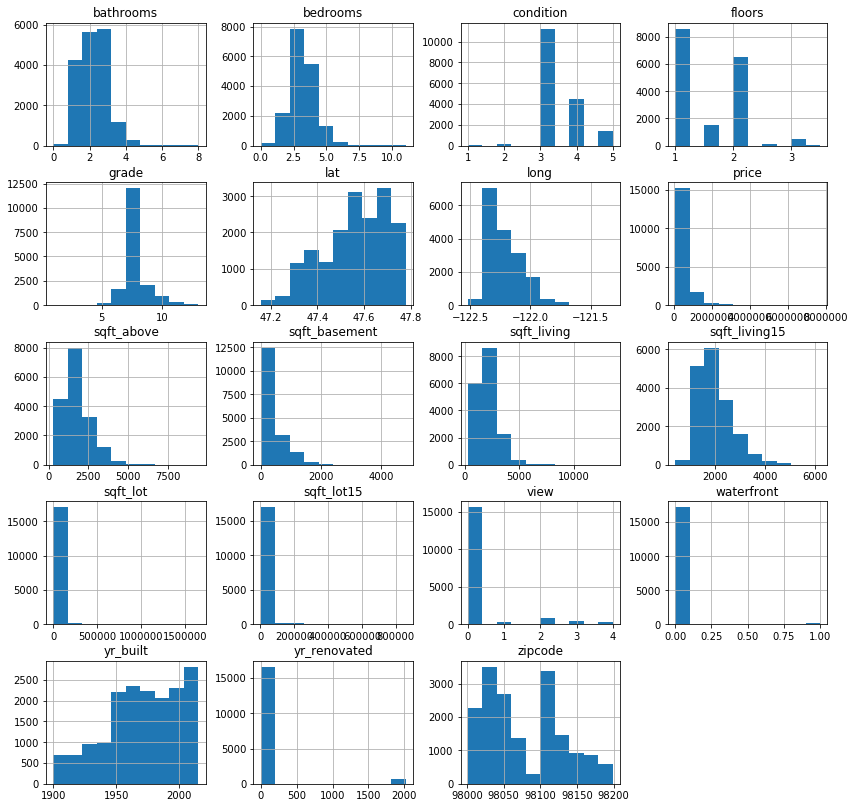

In [51]:
df.hist(figsize=(14,14))

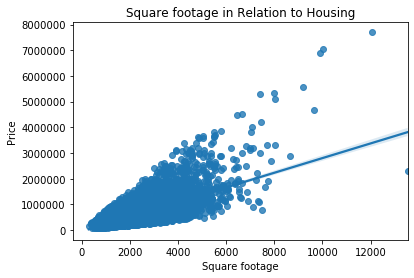

In [52]:
# One of the biggest selling points of any house is how big it is so I wanted to see the relationship with 
#pure square footage and price
sns.regplot(data=df,x='sqft_living',y='price');
plt.title("Square footage in Relation to Housing");
plt.xlabel("Square footage");
plt.ylabel("Price");

In [53]:
#After seeing the strong relationship with square footage and price I decided to test my theory with a corrilation
#test, and it does in fact have a strong relationship
corr = stats.pearsonr(df.sqft_living, df.price)
corr

(0.7035403039789669, 0.0)

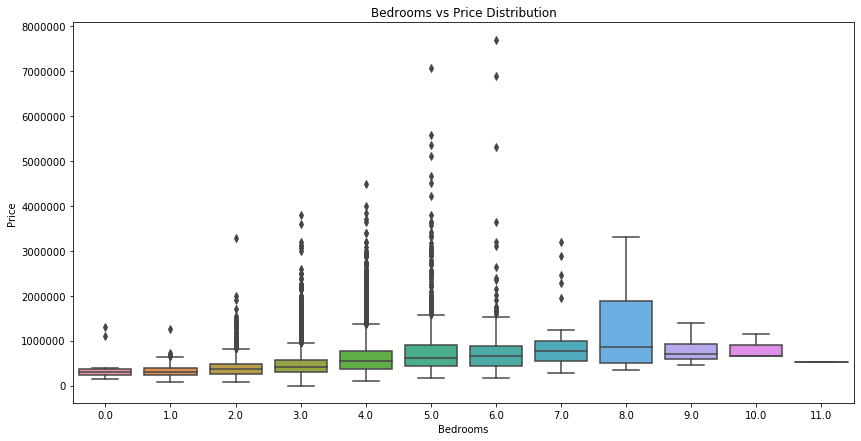

In [171]:
#Another Selling point that I think of when buying a house is the number of bedrooms
fig, ax = plt.subplots(figsize=(14, 7))
sns.boxplot(x='bedrooms', y="price", data=df)
ax.set(xlabel='Bedrooms', ylabel='Price',title='Bedrooms vs Price Distribution');

In [54]:
#manipulating date column to add year, month, and day columns
df['date'] = df['date'].str.slice(0,8,1)
df['year_sold'] = df['date'].str.slice(0,4,1)
df['month_sold'] = df['date'].str.slice(4,6,1)
df['day_sold'] = df['date'].str.slice(6,8,1)

In [55]:
#changing the datatype of the date columns into integers
df['year_sold'] = df['year_sold'].astype('int64')
df['month_sold'] = df['month_sold'].astype('int64')
df['day_sold'] = df['day_sold'].astype('int64')

In [57]:
zip_dummies = pd.get_dummies(df['zipcode'],prefix='zip',drop_first=True)


In [59]:
df.head()
zip_dummies.head()

,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [60]:
no_zip_df = df.drop(['zipcode'], axis=1)

In [62]:
ols_1 = pd.concat([no_zip_df, zip_dummies], axis=1)


In [65]:
ols_1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold,day_sold,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,365000.0,4.0,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,47.4388,-122.162,2390,7700,2014,10,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,865000.0,5.0,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,47.6784,-122.285,2370,6283,2014,8,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1038000.0,4.0,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,47.5646,-122.129,3710,9685,2014,8,15,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1490000.0,3.0,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,47.6995,-122.228,4050,14226,2015,3,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,711000.0,3.0,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,47.6647,-122.083,2250,4050,2014,7,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [64]:
#Dropping the date function since I have the other columns now
ols_1= ols_1.drop(columns='date')

In [66]:
#select target variable 
outcome = 'price'
#seperate target from the predictors
predictors = ols_1.drop('price',axis=1)
#place a + between each predictor column name
pred_sum = '+'.join(predictors.columns)
#place a ~ between the target and the predictor sum and save as variable formula
formula = outcome + '~' + pred_sum

In [67]:
#ols model using the new dataframe
model_1 = ols(formula=formula, data=ols_1).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     814.7
Date:                Mon, 25 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:15:31   Log-Likelihood:            -2.3217e+05
No. Observations:               17290   AIC:                         4.645e+05
Df Residuals:                   17201   BIC:                         4.652e+05
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.001e+08   1.11e+07     -8.979      0.000   -1.22e+08   -7.82e+07
bedrooms      -3.068e+04   1811.733    -16.933      0.000   -3.42e+04   -2.71e+04
bathrooms      2.503e+04   3006.692      8.325      0.000    1.91e+04    3.09e+04
sqft_living     117.3019      2.100     55.846      0.000     113.185     121.419
sqft_lot          0.2139      0.042      5.080      0.000       0.131       0.296
floors        -4.593e+04   3611.064    -12.719      0.000    -5.3e+04   -3.89e+04
waterfront     6.672e+05   1.58e+04     42.316      0.000    6.36e+05    6.98e+05
view           5.448e+04   1990.941     27.366      0.000    5.06e+04    5.84e+04
condition      2.711e+04   2203.138     12.304      0.000    2.28e+04    3.14e+04
grade          5.613e+04   2082.370     26.953      0.000     5.2e+04    6.02e+04
sqft_above       99.0001      2.169     45.634      0.000      94.748     103.252
sqft_basement    18.0138      2.482      7.256      0.000      13.148      22.880
yr_built       -730.3771     74.414     -9.815      0.000    -876.236    -584.519
yr_renovated     17.8736      3.382      5.285      0.000      11.244      24.503
lat            2.208e+05   7.23e+04      3.053      0.002     7.9e+04    3.63e+05
long          -1.443e+05   5.15e+04     -2.801      0.005   -2.45e+05   -4.33e+04
sqft_living15    10.0114      3.309      3.025      0.002       3.525      16.497
sqft_lot15       -0.0697      0.068     -1.024      0.306      -0.203       0.064
year_sold      3.619e+04   4337.539      8.342      0.000    2.77e+04    4.47e+04
month_sold     1414.4211    650.235      2.175      0.030     139.895    2688.948
day_sold       -254.6281    146.859     -1.734      0.083    -542.486      33.230
zip_98002      3.455e+04   1.67e+04      2.069      0.039    1825.933    6.73e+04
zip_98003     -2.564e+04   1.49e+04     -1.725      0.085   -5.48e+04    3493.313
zip_98004      7.342e+05    2.7e+04     27.227      0.000    6.81e+05    7.87e+05
zip_98005      2.373e+05   2.85e+04      8.320      0.000    1.81e+05    2.93e+05
zip_98006      2.242e+05   2.35e+04      9.544      0.000    1.78e+05     2.7e+05
zip_98007      1.991e+05   2.93e+04      6.794      0.000    1.42e+05    2.57e+05
zip_98008      2.001e+05    2.8e+04      7.136      0.000    1.45e+05    2.55e+05
zip_98010      9.542e+04   2.57e+04      3.715      0.000    4.51e+04    1.46e+05
zip_98011      3.529e+04   3.65e+04      0.968      0.333   -3.62e+04    1.07e+05
zip_98014      8.252e+04   4.01e+04      2.059      0.040    3964.505    1.61e+05
zip_98019      3.206e+04   3.95e+04      0.811      0.417   -4.54e+04     1.1e+05
zip_98022      4.403e+04   2.19e+04      2.014      0.044    1181.448    8.69e+04
zip_98023     -4.945e+04   1.36e+04     -3.635      0.000   -7.61e+04   -2.28e+04
zip_98024      1.492e+05   3.52e+04      4.241   

In [68]:
#Train test split train data
y = ols_1[['price']]
x = ols_1.drop(['price'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)



linreg = LinearRegression()
linreg.fit(x_train, y_train)
#predict on test data
y_hat_train_1 = linreg.predict(x_train)
y_hat_test_1 = linreg.predict(x_test)
# calculate RMSE
train_mse_1 = (mean_squared_error(y_train, y_hat_train_1))**.5
test_mse_1 = (mean_squared_error(y_test, y_hat_test_1))**.5
print('train_mse_1',train_mse_1,'test_mse_1',test_mse_1)

train_mse_1 165975.67356103563 test_mse_1 157469.43803571266


In [69]:
#My rmse looks good, but with the test rmse lower then the train rmse, it tells me that my model
#probably underfitted

In [74]:
#Generating polynomials for more interaction
df_features = ols_1.drop(['price'], axis = 1)
poly_2 = PolynomialFeatures(degree=2, include_bias=False)
poly2_data = poly_2.fit_transform(df_features)
poly2_columns = poly_2.get_feature_names(df_features.columns)
df_poly2 = pd.DataFrame(poly2_data, columns=poly2_columns)
df_poly2.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0       4.0       2.25       2070.0    8893.0     2.0         0.0   0.0   
1       5.0       3.00       2900.0    6730.0     1.0         0.0   0.0   
2       4.0       2.50       3770.0   10893.0     2.0         0.0   2.0   
3       3.0       3.50       4560.0   14608.0     2.0         0.0   2.0   
4       3.0       2.50       2550.0    5376.0     2.0         0.0   0.0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0        4.0    8.0      2070.0            0.0    1986.0           0.0   
1        5.0    8.0      1830.0         1070.0    1977.0           0.0   
2        3.0   11.0      3770.0            0.0    1997.0           0.0   
3        3.0   12.0      4560.0            0.0    1990.0           0.0   
4        3.0    9.0      2550.0            0.0    2004.0           0.0   

       lat     long  sqft_living15  sqft_lot15  year_sold  month_sold  \
0  47.4388 -122.162         2390.0      7700.0     2014.0        10.0   
1  47.6784 -122.285         2370.0      6283.0     2014.0         8.0   
2  47.5646 -122.129         3710.0      9685.0     2014.0         8.0   
3  47.6995 -122.228         4050.0     14226.0     2015.0         3.0   
4  47.6647 -122.083         2250.0      4050.0     2014.0         7.0   

   day_sold  zip_98002  zip_98003  zip_98004  zip_98005  zip_98006  zip_98007  \
0       6.0        0.0        0.0        0.0        0.0        0.0        0.0   
1      21.0        0.0        0.0        0.0        0.0        0.0        0.0   
2      15.0        0.0        0.0        0.0        0.0        1.0        0.0   
3      31.0        0.0        0.0        0.0        0.0        0.0        0.0   
4      14.0        0.0        0.0        0.0        0.0        0.0        0.0   

   zip_98008  zip_98010  zip_98011  zip_98014  zip_98019  zip_98022  \
0        0.0        0.0        0.0        0.0        0.0        0.0   
1        0.0        0.0        0.0        0.0        0.0        0.0   
2        0.0        0.0        0.0        0.0        0.0        0.0   
3        0.0        0.0        0.0        0.0        0.0        0.0   
4        0.0        0.0        0.0        0.0        0.0        0.0   

   zip_98023  zip_98024  zip_98027  zip_98028  zip_98029  zip_98030  \
0        0.0        0.0        0.0        0.0        0.0        0.0   
1        0.0        0.0        0.0        0.0        0.0        0.0   
2        0.0        0.0        0.0        0.0        0.0        0.0   
3        0.0        0.0        0.0        0.0        0.0        0.0   
4        0.0        0.0        0.0        0.0        0.0        0.0   

   zip_98031  zip_98032  zip_98033  zip_98034  zip_98038  zip_98039  \
0        0.0        0.0        0.0        0.0        0.0        0.0   
1        0.0        0.0        0.0        0.0        0.0        0.0   
2        0.0        0.0        0.0        0.0        0.0        0.0   
3        0.0        0.0        0.0        1.0        0.0        0.0   
4        0.0        0.0        0.0        0.0        0.0        0.0   

   zip_98040  zip_98042  zip_98045  zip_98052  zip_98053  zip_98055  \
0        0.0        0.0        0.0        0.0        0.0        0.0   
1        0.0        0.0        0.0        0.0        0.0        0.0   
2        0.0        0.0        0.0        0.0        0.0        0.0   
3        0.0        0.0        0.0        0.0        0.0        0.0   
4        0.0        0.0        0.0        1.0        0.0        0.0   

   zip_98056  zip_98058  zip_98059  zip_98065  zip_98070  zip_98072  \
0        0.0        1.0        0.0        0.0        0.0        0.0   
1        0.0        0.0        0.0        0.0        0.0        0.0   
2        0.0        0.0        0.0        0.0        0.0        0.0   
3        0.0        0.0        0.0        0.0        0.0        0.0   
4        0.0        0.0        0.0        0.0        0.0        0.0   

   zip_98074  zip_98075  zip_98077  zip_98092 

In [78]:
target= ols_1[['price']]

In [79]:
X_train, X_test, y_train, y_test = train_test_split(df_poly2, target, random_state=35,test_size=0.2)


In [80]:
scaler2 = StandardScaler()
# fit the scaler to the training data
scaler2.fit(X_train)

#transform the training data
X_train = pd.DataFrame(data=scaler2.transform(X_train), columns=df_poly2.columns)

#transform the testing data
X_test = pd.DataFrame(data=scaler2.transform(X_test), columns=df_poly2.columns)

In [81]:
X_train.shape

(13832, 4094)

In [93]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
from sklearn import metrics


selector = SelectKBest(f_regression, k=115)

selector.fit(X_train, y_train)


/Users/kelvinarellano/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kelvinarellano/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


SelectKBest(k=115, score_func=<function f_regression at 0x7fac3c3a4488>)

In [88]:
selector.get_support()

array([ True,  True,  True, ..., False, False, False])

In [89]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]
# X_train = X_train[selected_columns]
# X_test = X_test[selected_columns]

In [90]:
list(removed_columns)


['sqft_lot',
 'floors',
 'waterfront',
 'condition',
 'yr_built',
 'yr_renovated',
 'long',
 'sqft_lot15',
 'year_sold',
 'month_sold',
 'day_sold',
 'zip_98002',
 'zip_98003',
 'zip_98004',
 'zip_98005',
 'zip_98006',
 'zip_98007',
 'zip_98008',
 'zip_98010',
 'zip_98011',
 'zip_98014',
 'zip_98019',
 'zip_98022',
 'zip_98023',
 'zip_98024',
 'zip_98027',
 'zip_98028',
 'zip_98029',
 'zip_98030',
 'zip_98031',
 'zip_98032',
 'zip_98033',
 'zip_98034',
 'zip_98038',
 'zip_98039',
 'zip_98040',
 'zip_98042',
 'zip_98045',
 'zip_98052',
 'zip_98053',
 'zip_98055',
 'zip_98056',
 'zip_98058',
 'zip_98059',
 'zip_98065',
 'zip_98070',
 'zip_98072',
 'zip_98074',
 'zip_98075',
 'zip_98077',
 'zip_98092',
 'zip_98102',
 'zip_98103',
 'zip_98105',
 'zip_98106',
 'zip_98107',
 'zip_98108',
 'zip_98109',
 'zip_98112',
 'zip_98115',
 'zip_98116',
 'zip_98117',
 'zip_98118',
 'zip_98119',
 'zip_98122',
 'zip_98125',
 'zip_98126',
 'zip_98133',
 'zip_98136',
 'zip_98144',
 'zip_98146',
 'zip_98148

In [91]:
list(selected_columns)


['bedrooms',
 'bathrooms',
 'sqft_living',
 'view',
 'grade',
 'sqft_above',
 'sqft_basement',
 'lat',
 'sqft_living15',
 'bedrooms^2',
 'bedrooms bathrooms',
 'bedrooms sqft_living',
 'bedrooms floors',
 'bedrooms waterfront',
 'bedrooms view',
 'bedrooms grade',
 'bedrooms sqft_above',
 'bedrooms sqft_basement',
 'bedrooms yr_built',
 'bedrooms lat',
 'bedrooms long',
 'bedrooms sqft_living15',
 'bedrooms year_sold',
 'bathrooms^2',
 'bathrooms sqft_living',
 'bathrooms floors',
 'bathrooms waterfront',
 'bathrooms view',
 'bathrooms condition',
 'bathrooms grade',
 'bathrooms sqft_above',
 'bathrooms sqft_basement',
 'bathrooms yr_built',
 'bathrooms lat',
 'bathrooms long',
 'bathrooms sqft_living15',
 'bathrooms year_sold',
 'bathrooms month_sold',
 'bathrooms zip_98004',
 'sqft_living^2',
 'sqft_living floors',
 'sqft_living waterfront',
 'sqft_living view',
 'sqft_living condition',
 'sqft_living grade',
 'sqft_living sqft_above',
 'sqft_living sqft_basement',
 'sqft_living yr_b

In [94]:
#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest.fit(X_train[selected_columns], y_train)

y_train_kbest = lm_kbest.predict(X_train[selected_columns])


trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


print('Training Root Mean Squared Error:' , trainK_rmse)

y_kbest = lm_kbest.predict(X_test[selected_columns])

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Testing Root Mean Squared Error:' , testK_rmse)


Training Root Mean Squared Error: 155347.1936167805
Testing Root Mean Squared Error: 164556.9978294317


In [95]:
#After creating polynomials and selecting the 115 best features by running an f test we have lowered my rmse
#and my model no longer shows signs of over fitting

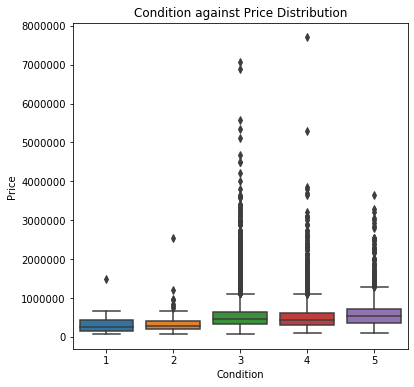

In [111]:
#individual feature engineering
# Boxplots comparing the condition of the house vs price

fig, ax = plt.subplots(figsize=(6, 6))
sns.boxplot(x='condition', y="price", data=df)
ax.set(xlabel='Condition', ylabel='Price',title='Condition against Price Distribution');

In [114]:
alpha = 0.05 
#ANOVA Test Setup
formula = 'price~C(condition)'
lm_condition = ols(formula, df).fit()
anova_condition = sm.stats.anova_lm(lm_condition, typ=2)

if anova_condition["PR(>F)"][0] < alpha:
    print("The property condition have a statistically significant impact on average property value")
    print("Conditions F-statisic Probability: ", anova_condition["PR(>F)"][0])

The property condition have a statistically significant impact on average property value
Conditions F-statisic Probability:  6.813536869395142e-24


In [115]:
#Condition does have a statistically significant impact on price, but it looks like the price dips when going from 
# 3 to 4 aswell as 1 to 2. I think this is because people don't know what to do with middling scores


In [169]:
df['basement'] = df["sqft_basement"] > 0
#df['basement_mean'] = df['basement'].price.mean()
df['no_basement'] = df["sqft_basement"] == 0
#df['no_basement_mean'] = df['no_basement'].price.mean()

#mean values to plot
df['renovated'] = df["yr_renovated"] > 0
#df['renovated_mean'] = renovated.price.mean()
df['not_renovated'] = df["yr_renovated"] == 0
#df['not_renovated_mean'] = not_renovated.price.mean()
df['basement'].value_counts()

False    10483
True      6808
Name: basement, dtype: int64

[Text(0, 0.5, 'Price'),
 Text(0.5, 0, 'Basement'),
 Text(0.5, 1.0, 'Basement effect on Price')]

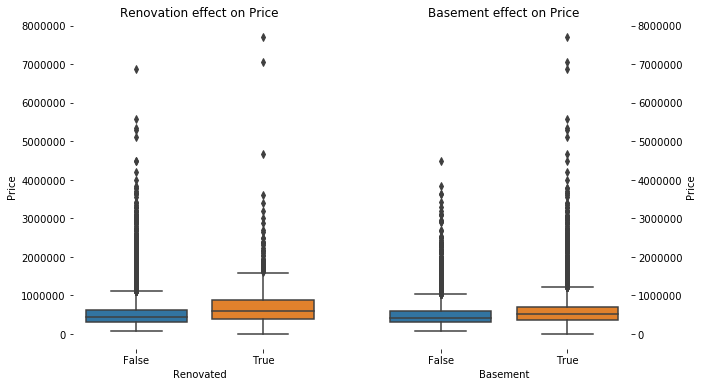

In [168]:
# Boxplots comparing 
#(1) Houses with waterfront to Houses without waterfront
## Waterfront houses seem to be significantly more expensive 
#(2) Houses with basement to Houses without basements 
## Not a great difference between house with/without basements

f, axes = plt.subplots(1, 2, figsize=(10,6))
sns.boxplot(x=df.renovated,y=df['price'], ax=axes[0])
sns.boxplot(x=df.basement,y=df['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Renovated', ylabel='Price', title = "Renovation effect on Price")
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='Basement', ylabel='Price', title = "Basement effect on Price")


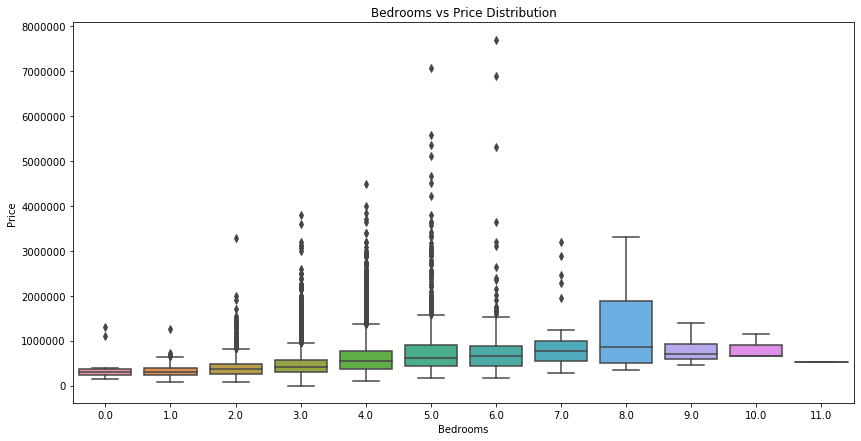

In [151]:
fig, ax = plt.subplots(figsize=(14, 7))
sns.boxplot(x='bedrooms', y="price", data=df)
ax.set(xlabel='Bedrooms', ylabel='Price',title='Bedrooms vs Price Distribution');

In [172]:
#making one finalfeature for the age of renovation
df["renovation_age"] = df.yr_renovated.apply(lambda x: 2020-x if x > 0 else 0)

In [179]:
no_zip_df_2 = df.drop(['zipcode'], axis=1)

In [190]:
zip_dummies_2 = pd.get_dummies(df['zipcode'],prefix='zip',drop_first=True)

In [196]:
zip_dummies_2 = zip_dummies_2.iloc[1:]

In [188]:
no_zip_df_2 = no_zip_df_2.iloc[1:]

In [192]:
no_zip_df_2= no_zip_df_2.drop(columns='date')

In [246]:
ols_2 = pd.concat([no_zip_df_2, zip_dummies_2], axis=1)

In [247]:
#select target variable 
outcome_2 = 'price'
#seperate target from the predictors
predictors_2 = ols_2.drop('price',axis=1)
#place a + between each predictor column name
pred_sum_2 = '+'.join(predictors_2.columns)
#place a ~ between the target and the predictor sum and save as variable formula
formula_2 = outcome_2 + '~' + pred_sum_2

In [251]:
#ols model using the new dataframe
model_2 = ols(formula=formula_2, data=ols_2).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     792.7
Date:                Wed, 27 Jan 2021   Prob (F-statistic):               0.00
Time:                        20:57:40   Log-Likelihood:            -2.3212e+05
No. Observations:               17290   AIC:                         4.644e+05
Df Residuals:                   17198   BIC:                         4.651e+05
Df Model:                          91                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -4.015e+07    4.4e+06     -9.119      0.000   -4.88e+07   -3.15e+07
basement[T.True]      -2.009e+07    2.2e+06     -9.125      0.000   -2.44e+07   -1.58e+07
no_basement[T.True]   -2.006e+07    2.2e+06     -9.112      0.000   -2.44e+07   -1.57e+07
renovated[T.True]       -20.9344      2.161     -9.687      0.000     -25.170     -16.698
not_renovated[T.True] -4.015e+07    4.4e+06     -9.119      0.000   -4.88e+07   -3.15e+07
bedrooms              -3.086e+04   1807.588    -17.072      0.000   -3.44e+04   -2.73e+04
bathrooms              2.633e+04   3023.934      8.706      0.000    2.04e+04    3.23e+04
sqft_living            -3.44e+07   3.69e+06     -9.332      0.000   -4.16e+07   -2.72e+07
sqft_lot                  0.2187      0.042      5.207      0.000       0.136       0.301
floors                -4.651e+04   3612.116    -12.875      0.000   -5.36e+04   -3.94e+04
waterfront             6.711e+05   1.57e+04     42.630      0.000     6.4e+05    7.02e+05
view                   5.421e+04   1988.111     27.267      0.000    5.03e+04    5.81e+04
condition              2.768e+04   2203.266     12.564      0.000    2.34e+04     3.2e+04
grade                  5.642e+04   2082.830     27.090      0.000    5.23e+04    6.05e+04
sqft_above              3.44e+07   3.69e+06      9.332      0.000    2.72e+07    4.16e+07
sqft_basement           3.44e+07   3.69e+06      9.332      0.000    2.72e+07    4.16e+07
yr_built               -725.2863     74.260     -9.767      0.000    -870.844    -579.729
yr_renovated          -1.982e+04   2179.388     -9.096      0.000   -2.41e+04   -1.56e+04
lat                    2.239e+05   7.21e+04      3.104      0.002    8.25e+04    3.65e+05
long                  -1.457e+05   5.14e+04     -2.836      0.005   -2.46e+05    -4.5e+04
sqft_living15            11.0078      3.303      3.333      0.001       4.533      17.482
sqft_lot15               -0.0697      0.068     -1.027      0.304      -0.203       0.063
year_sold              3.677e+04   4327.779      8.496      0.000    2.83e+04    4.53e+04
month_sold             1491.7184    648.768      2.299      0.021     220.068    2763.369
day_sold               -252.9359    146.511     -1.726      0.084    -540.113      34.241
renovation_age        -2.257e+04   2215.778    -10.188      0.000   -2.69e+04   -1.82e+04
zip_98001             -1.218e+06   1.15e+05    -10.631      0.000   -1.44e+06   -9.94e+05
zip_98002             -1.185e+06   1.13e+05    -10.457      0.000   -1.41e+06   -9.63e+05
zip_98003             -1.244e+06   1.16e+05    -10.721      0.000   -1.47e+06   -1.02e+06
zip_98004             -4.877e+05   1.17e+05     -4.165      0.000   -7.17e+05   -2.58e+05
zip_98005             -9.826e+05   1.16e+05     -8.447      0.000   -1.21e+06   -7.55e+05
zip_98006             -

In [253]:
#Train test split train data
y_2 = ols_2[['price']]
x_2 = ols_2.drop(['price'],axis=1)
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2,y_2, test_size=0.2, random_state=42)



linreg = LinearRegression()
linreg.fit(x_train_2, y_train_2)
#predict on test data
y_hat_train_2 = linreg.predict(x_train_2)
y_hat_test_2 = linreg.predict(x_test_2)
# calculate RMSE
train_mse_2 = (mean_squared_error(y_train_2, y_hat_train_2))**.5
test_mse_2 = (mean_squared_error(y_test_2, y_hat_test_2))**.5
print('train_mse_2',train_mse_2,'test_mse_2',test_mse_2)

train_mse_2 163131.3842100835 test_mse_2 167948.94039235942


In [254]:
#Generating polynomials for more interaction
df_features_2 = ols_2.drop(['price'], axis = 1)
poly_3 = PolynomialFeatures(degree=2, include_bias=False)
poly3_data = poly_3.fit_transform(df_features_2)
poly3_columns = poly_3.get_feature_names(df_features_2.columns)
df_poly3 = pd.DataFrame(poly3_data, columns=poly3_columns)
df_poly3.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0       5.0        3.0       2900.0    6730.0     1.0         0.0   0.0   
1       4.0        2.5       3770.0   10893.0     2.0         0.0   2.0   
2       3.0        3.5       4560.0   14608.0     2.0         0.0   2.0   
3       3.0        2.5       2550.0    5376.0     2.0         0.0   0.0   
4       4.0        2.0       1710.0    8288.0     1.5         0.0   0.0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0        5.0    8.0      1830.0         1070.0    1977.0           0.0   
1        3.0   11.0      3770.0            0.0    1997.0           0.0   
2        3.0   12.0      4560.0            0.0    1990.0           0.0   
3        3.0    9.0      2550.0            0.0    2004.0           0.0   
4        3.0    7.0      1710.0            0.0    1970.0           0.0   

       lat     long  sqft_living15  sqft_lot15  year_sold  month_sold  \
0  47.6784 -122.285         2370.0      6283.0     2014.0         8.0   
1  47.5646 -122.129         3710.0      9685.0     2014.0         8.0   
2  47.6995 -122.228         4050.0     14226.0     2015.0         3.0   
3  47.6647 -122.083         2250.0      4050.0     2014.0         7.0   
4  47.3947 -122.174         1710.0      7200.0     2014.0         8.0   

   day_sold  basement  no_basement  renovated  not_renovated  renovation_age  \
0      21.0       1.0          0.0        0.0            1.0             0.0   
1      15.0       0.0          1.0        0.0            1.0             0.0   
2      31.0       0.0          1.0        0.0            1.0             0.0   
3      14.0       0.0          1.0        0.0            1.0             0.0   
4      27.0       0.0          1.0        0.0            1.0             0.0   

   zip_98001  zip_98002  zip_98003  zip_98004  zip_98005  zip_98006  \
0        0.0        0.0        0.0        0.0        0.0        0.0   
1        0.0        0.0        0.0        0.0        0.0        1.0   
2        0.0        0.0        0.0        0.0        0.0        0.0   
3        0.0        0.0        0.0        0.0        0.0        0.0   
4        0.0        0.0        0.0        0.0        0.0        0.0   

   zip_98007  zip_98008  zip_98010  zip_98011  zip_98014  zip_98019  \
0        0.0        0.0        0.0        0.0        0.0        0.0   
1        0.0        0.0        0.0        0.0        0.0        0.0   
2        0.0        0.0        0.0        0.0        0.0        0.0   
3        0.0        0.0        0.0        0.0        0.0        0.0   
4        0.0        0.0        0.0        0.0        0.0        0.0   

   zip_98022  zip_98023  zip_98024  zip_98027  zip_98028  zip_98029  \
0        0.0        0.0        0.0        0.0        0.0        0.0   
1        0.0        0.0        0.0        0.0        0.0        0.0   
2        0.0        0.0        0.0        0.0        0.0        0.0   
3        0.0        0.0        0.0        0.0        0.0        0.0   
4        0.0        0.0        0.0        0.0        0.0        0.0   

   zip_98030  zip_98031  zip_98032  zip_98033  zip_98034  zip_98038  \
0        0.0        0.0        0.0        0.0        0.0        0.0   
1        0.0        0.0        0.0        0.0        0.0        0.0   
2        0.0        0.0        0.0        0.0        1.0        0.0   
3        0.0        0.0        0.0        0.0        0.0        0.0   
4        0.0        1.0        0.0        0.0        0.0        0.0   

   zip_98039  zip_98040  zip_98042  zip_98045  zip_98052  zip_98053  \
0        0.0        0.0        0.0        0.0        0.0        0.0   
1        0.0        0.0        0.0        0.0        0.0        0.0   
2        0.0        0.0        0.0        0.0        0.0        0.0   
3        0.0        0.0        0.0        0.0        1.0        0.0   
4        0.0        0.0        0.0        0.0        0.0        0.0   

   zip_98055  zip_98056  zip_98058  zip_98059  zip_9

In [255]:
target_2= ols_2[['price']]

In [256]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df_poly3, target_2, random_state=35,test_size=0.2)


In [257]:
scaler3 = StandardScaler()
# fit the scaler to the training data
scaler3.fit(X_train_2)

#transform the training data
X_train_2 = pd.DataFrame(data=scaler3.transform(X_train_2), columns=df_poly3.columns)

#transform the testing data
X_test_2 = pd.DataFrame(data=scaler3.transform(X_test_2), columns=df_poly3.columns)

In [258]:
X_train_2.shape

(13832, 4655)

In [259]:
selector = SelectKBest(f_regression, k=115)

selector.fit(X_train_2, y_train_2)

/Users/kelvinarellano/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kelvinarellano/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


SelectKBest(k=115, score_func=<function f_regression at 0x7fac3c3a4488>)

In [260]:
selected_columns_2 = X_train_2.columns[selector.get_support()]
removed_columns_2 = X_train_2.columns[~selector.get_support()]
# X_train = X_train[selected_columns]
# X_test = X_test[selected_columns]

In [261]:
list(removed_columns_2)


['bedrooms',
 'sqft_lot',
 'floors',
 'waterfront',
 'condition',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_lot15',
 'year_sold',
 'month_sold',
 'day_sold',
 'basement',
 'no_basement',
 'renovated',
 'not_renovated',
 'renovation_age',
 'zip_98001',
 'zip_98002',
 'zip_98003',
 'zip_98004',
 'zip_98005',
 'zip_98006',
 'zip_98007',
 'zip_98008',
 'zip_98010',
 'zip_98011',
 'zip_98014',
 'zip_98019',
 'zip_98022',
 'zip_98023',
 'zip_98024',
 'zip_98027',
 'zip_98028',
 'zip_98029',
 'zip_98030',
 'zip_98031',
 'zip_98032',
 'zip_98033',
 'zip_98034',
 'zip_98038',
 'zip_98039',
 'zip_98040',
 'zip_98042',
 'zip_98045',
 'zip_98052',
 'zip_98053',
 'zip_98055',
 'zip_98056',
 'zip_98058',
 'zip_98059',
 'zip_98065',
 'zip_98070',
 'zip_98072',
 'zip_98074',
 'zip_98075',
 'zip_98077',
 'zip_98092',
 'zip_98102',
 'zip_98103',
 'zip_98105',
 'zip_98106',
 'zip_98107',
 'zip_98108',
 'zip_98109',
 'zip_98112',
 'zip_98115',
 'zip_98116',
 'zip_98117',
 'zip_98118',
 'zip_98

In [262]:
list(selected_columns_2)

['bathrooms',
 'sqft_living',
 'view',
 'grade',
 'sqft_above',
 'sqft_basement',
 'sqft_living15',
 'bedrooms bathrooms',
 'bedrooms sqft_living',
 'bedrooms floors',
 'bedrooms waterfront',
 'bedrooms view',
 'bedrooms grade',
 'bedrooms sqft_above',
 'bedrooms sqft_basement',
 'bedrooms yr_built',
 'bedrooms lat',
 'bedrooms sqft_living15',
 'bathrooms^2',
 'bathrooms sqft_living',
 'bathrooms floors',
 'bathrooms waterfront',
 'bathrooms view',
 'bathrooms condition',
 'bathrooms grade',
 'bathrooms sqft_above',
 'bathrooms sqft_basement',
 'bathrooms yr_built',
 'bathrooms lat',
 'bathrooms long',
 'bathrooms sqft_living15',
 'bathrooms year_sold',
 'bathrooms basement',
 'bathrooms not_renovated',
 'bathrooms zip_98004',
 'sqft_living^2',
 'sqft_living floors',
 'sqft_living waterfront',
 'sqft_living view',
 'sqft_living condition',
 'sqft_living grade',
 'sqft_living sqft_above',
 'sqft_living sqft_basement',
 'sqft_living yr_built',
 'sqft_living lat',
 'sqft_living long',
 's

In [263]:
#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest.fit(X_train_2[selected_columns], y_train_2)

y_train_kbest_2 = lm_kbest.predict(X_train_2[selected_columns])


trainK_rmse_2 = np.sqrt(metrics.mean_squared_error(y_train_2, y_train_kbest_2))


print('Training Root Mean Squared Error:' , trainK_rmse_2)

y_kbest_2 = lm_kbest.predict(X_test_2[selected_columns])

testK_rmse_2 = np.sqrt(metrics.mean_squared_error(y_test_2, y_kbest_2))

print('Testing Root Mean Squared Error:' , testK_rmse_2)

Training Root Mean Squared Error: 156713.05064949678
Testing Root Mean Squared Error: 162739.48106584736


In [274]:
kc_rfecv = RFECV(estimator=LinearRegression(), step=1, cv=5, 
                 scoring="neg_mean_squared_error", n_jobs=-1)
kc_rfecv = kc_rfecv.fit(x_train_2, y_train_2)

/Users/kelvinarellano/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [275]:
x_train_rfecv = kc_rfecv.transform(x_train_2)
x_test_rfecv = kc_rfecv.transform(x_test_2)

In [278]:
#fit model
lm_kc_rfecv = LinearRegression().fit(x_train_rfecv, y_train_2)

#training data prediction
y_train_prediction_rfecv = lm_kc_rfecv.predict(x_test_rfecv)

#rmse
train_rmse_rfecv = np.sqrt(metrics.mean_squared_error(y_test_2, y_train_prediction_rfecv))


In [279]:
print("Linear Regression Model with Recursive Feature Elimination with Cross Validation Errors")
print("Root Mean Squared Error:" , train_rmse_rfecv)


Linear Regression Model with Recursive Feature Elimination with Cross Validation Errors
Root Mean Squared Error: 359012.1538086848
